## **EDA on given dataset**

*Fields include:*

*Rank - Ranking of overall sales*

*Name - The games name*

*Platform - Platform of the games release (i.e. PC,PS4, etc.)* 

*Year - Year of the game's release*

*Genre - Genre of the game*

*Publisher - Publisher of the game*

*NA_Sales - Sales in North America (in millions)*

*EU_Sales - Sales in Europe (in millions)*

*JP_Sales - Sales in Japan (in millions)*

*Other_Sales - Sales in the rest of the world (in millions)*

*Global_Sales - Total worldwide sales*

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### **Data preprocessing**

In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
duplicate = df.duplicated()
df[duplicate]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [5]:
df['Year'] = df['Year'].fillna(df['Year'].dropna().mode().values[0]) 
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].dropna().mode().values[0]) 

In [6]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

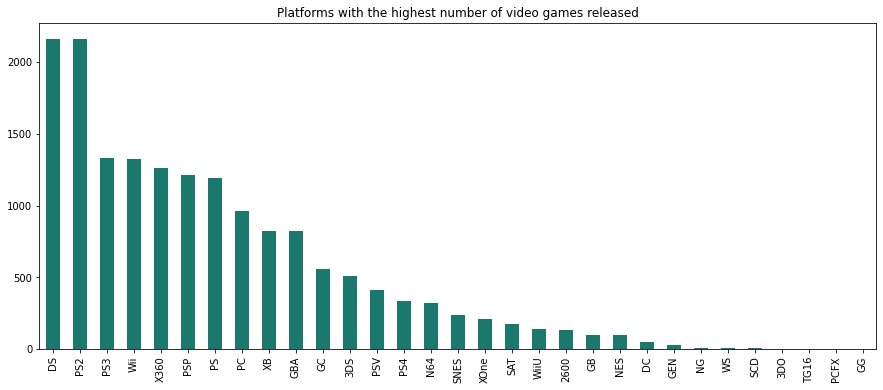

In [84]:
n = pd.value_counts(df.Platform)
n.plot(kind='bar', subplots=True, figsize=(15, 6), color='#1b786d')
plt.title("Platforms with the highest number of video games released")
plt.show()

- Inference - DS, PS2, PS3, Wii and X360 are the top 5 platforms wrt the number of total games released in each platform.

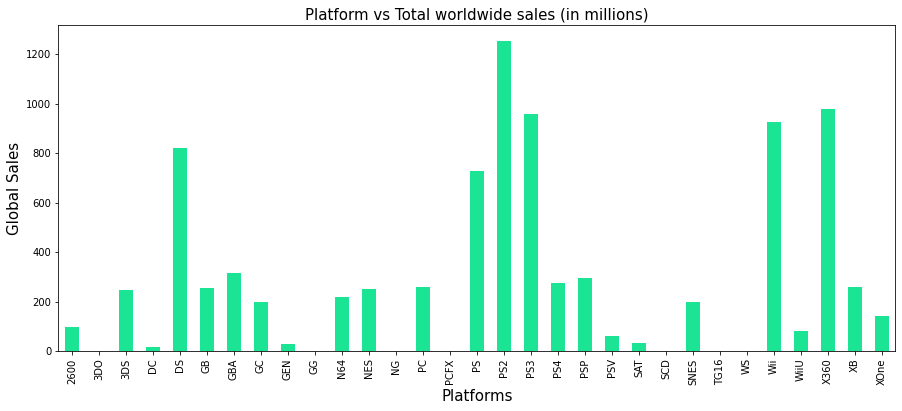

In [17]:
a = df.groupby('Platform')['Global_Sales'].sum('Global_Sales').sort_index().plot(kind = 'bar',figsize = (15,6), color='#1BE594')
a.set_xlabel('Platforms',fontsize = 15)
a.set_ylabel('Global Sales',fontsize = 15)
a.set_title('Platform vs Total worldwide sales (in millions)',fontsize = 15)
plt.show()

- Inference - PS2, X360, PS3, Wii and DS are the top 5 platforms wrt to the number of global sales of their respective games. We also notice that although the number of games released on PSP is comparatively higher than many other, the number of global sales of those respective games are much lower in comparison to others. We also mostly see that thee number of games released and the total global sales are directly proportional with a very few exceptions.

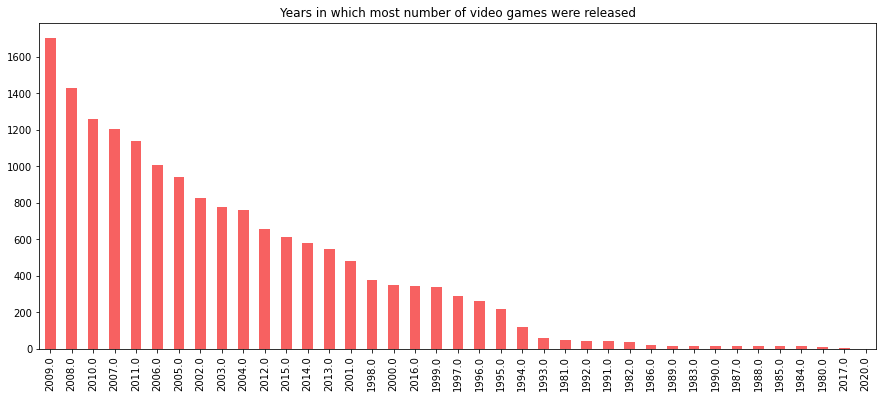

In [83]:
m = pd.value_counts(df.Year)
m.plot(kind='bar', subplots=True, figsize=(15, 6), color='#f76161')
plt.title("Years in which most number of video games were released")
plt.show()

- Inference - We notice here that most video games were released between the period 2001-2015 but significantly higher between 2007-2011. The number of video game releases each year has significantly decreased after 2016.

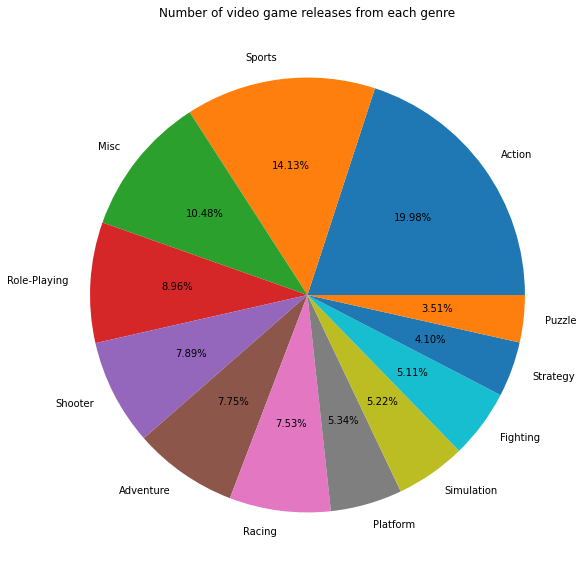

In [36]:
g = pd.value_counts(df.Genre)
g.plot(kind='pie', subplots=True, figsize=(10, 10), autopct='%1.2f%%')
plt.title("Number of video game releases from each genre")
plt.ylabel("")
plt.show()

- Inference - The number of video game releases per genre is high in genres like action, sports and misc.

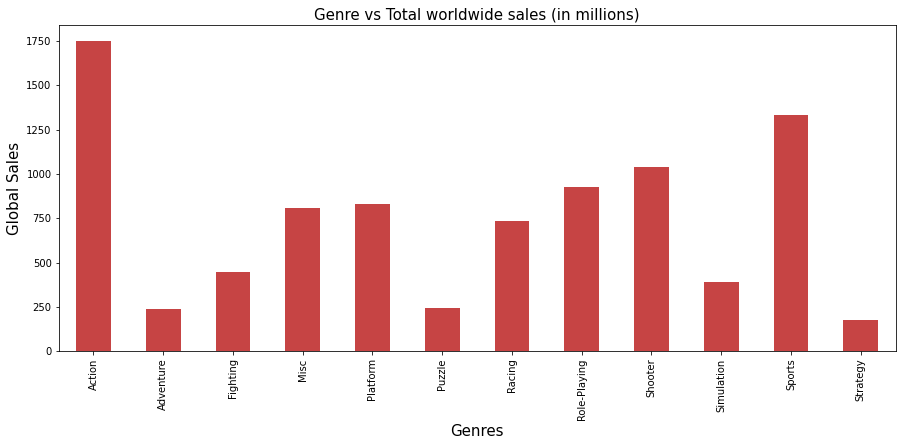

In [28]:
a = df.groupby('Genre')['Global_Sales'].sum('Global_Sales').sort_index().plot(kind = 'bar',figsize = (15,6), color='#c64444')
a.set_xlabel('Genres',fontsize = 15)
a.set_ylabel('Global Sales',fontsize = 15)
a.set_title('Genre vs Total worldwide sales (in millions)',fontsize = 15)
plt.show()

- Inference - We notice here that though platform has a 5% share in number of games released, its global sales is significantly higher. Also adventure disappoints with a comparatively lower number of sales. The others show an almost direct proportionality in this regard.


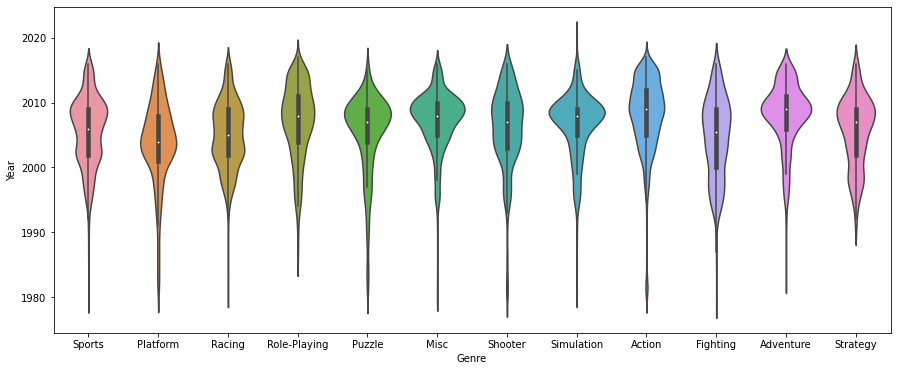

In [36]:
plt.figure(figsize = (15,6))
ax = sns.violinplot(x="Genre", y="Year", data=df)

- Inference - We notice here that a genre like fighting has been more consistent over the years compared to others, whereas some genres like adventure, simulation and misc have shown a hike in number of games released between years like 2007-2011.

In [47]:
np.unique(df['Publisher'])

array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy', '3DO', '49Games', '505 Games', '5pb', '7G//AMES',
       '989 Sports', '989 Studios', 'AQ Interactive', 'ASC Games',
       'ASCII Entertainment', 'ASCII Media Works', 'ASK', 'Abylight',
       'Acclaim Entertainment', 'Accolade', 'Ackkstudios', 'Acquire',
       'Activision', 'Activision Blizzard', 'Activision Value',
       'Adeline Software', 'Aerosoft', 'Agatsuma Entertainment', 'Agetec',
       'Aksys Games', 'Alawar Entertainment', 'Alchemist',
       'Alternative Software', 'Altron', 'Alvion', 'American Softworks',
       'Angel Studios', 'Answer Software', 'Aqua Plus', 'Aques',
       'Arc System Works', 'Arena Entertainment', 'Aria', 'Arika',
       'ArtDink', 'Aruze Corp', 'Ascaron Entertainment',
       'Ascaron Entertainment GmbH', 'Asgard', 'Asmik Ace Entertainment',
       'Asmik Corp', 'Aspyr', 'Astragon', 'Asylum Entertainment', 'Atari',
       'Athena', 'Atlus', 'Avalon Interactive

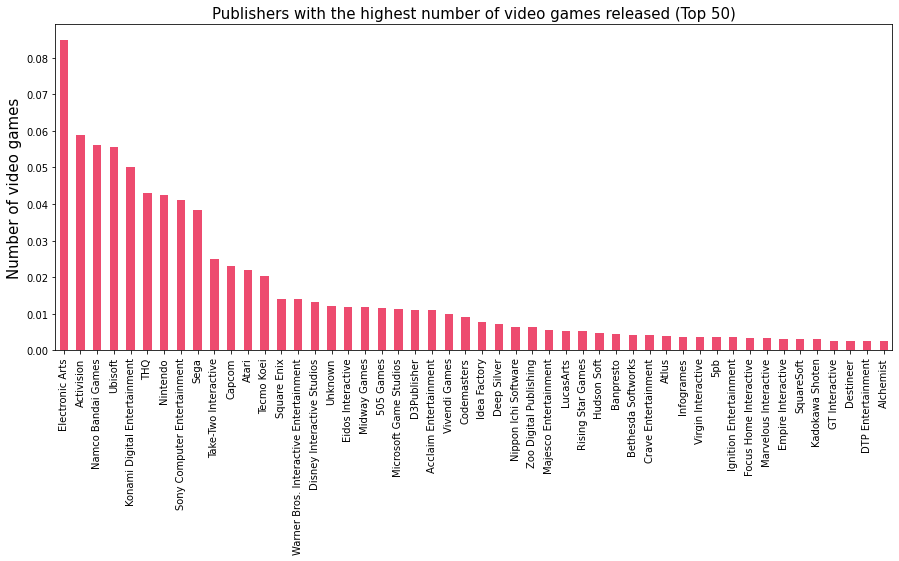

In [51]:
df['Publisher'].value_counts(normalize=True)[:50].plot.bar(figsize=(15,6), title='Publishers', color='#ed4b6f')
plt.title("Publishers with the highest number of video games released (Top 50)", fontsize=15)
plt.ylabel('Number of video games', fontsize=15)
plt.show()

- Inference - The most number of video game releases were by the following publishers, i.e., Electronic Arts, Activision, Namco Bandai Games, Ubisoft and THQ.

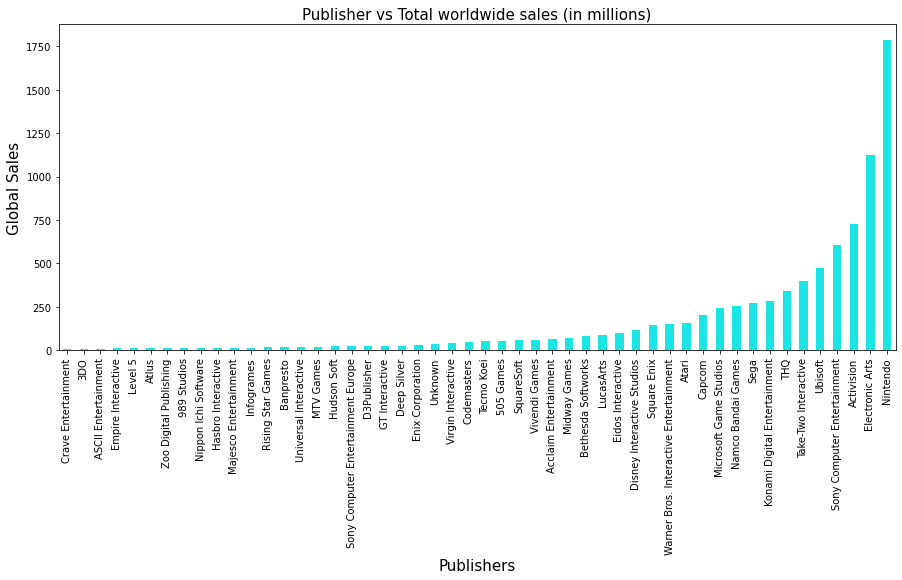

In [27]:
a = df.groupby('Publisher')['Global_Sales'].sum('Global_Sales').sort_values()[-50:].plot(kind = 'bar',figsize = (15,6), color='#1BE5E4')
a.set_xlabel('Publishers',fontsize = 15)
a.set_ylabel('Global Sales',fontsize = 15)
a.set_title('Publisher vs Total worldwide sales (in millions)',fontsize = 15)
plt.show()

- Inference - Though Nintendo isn't one among the top 5 video game releasing companies (total number of video games), but the global sales or revenue it generates is the highest, i.e., its games are valued more among others. Also we notice that though Namco Bandai Games have released high number games compared to many others, its global sales are relatively less.

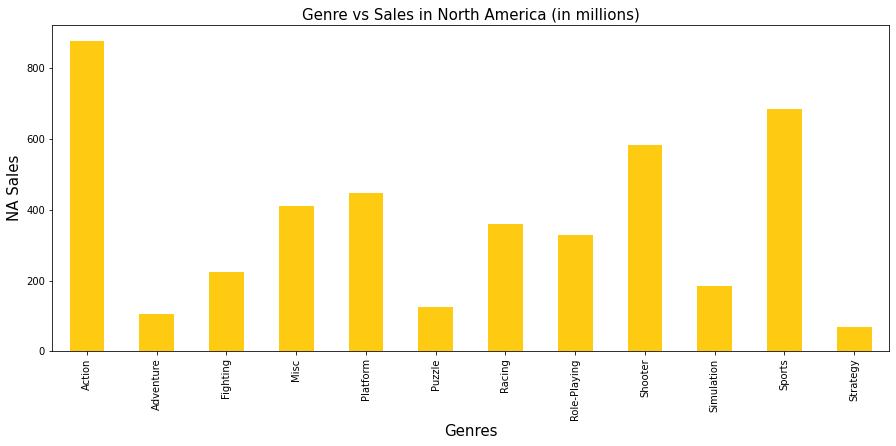

In [66]:
a = df.groupby('Genre')['NA_Sales'].sum('NA_Sales').sort_index().plot(kind = 'bar',figsize = (15,6), color='#ffcb12')
a.set_xlabel('Genres',fontsize = 15)
a.set_ylabel('NA Sales',fontsize = 15)
a.set_title('Genre vs Sales in North America (in millions)',fontsize = 15)
plt.show()

- Inference - We notice here that genres like action, sports and shooter have the most number of sales in north america.

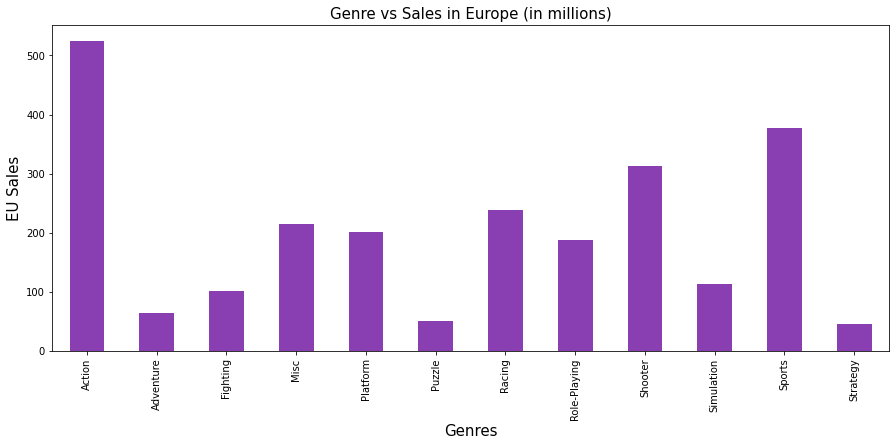

In [67]:
a = df.groupby('Genre')['EU_Sales'].sum('EU_Sales').sort_index().plot(kind = 'bar',figsize = (15,6), color='#893eb2')
a.set_xlabel('Genres',fontsize = 15)
a.set_ylabel('EU Sales',fontsize = 15)
a.set_title('Genre vs Sales in Europe (in millions)',fontsize = 15)
plt.show()

- Inference - We notice here that genres like action, sports and shooter have the most number of sales in europe similar to that of north america. We also see a huge similarity in pattern, both in europe and north america.

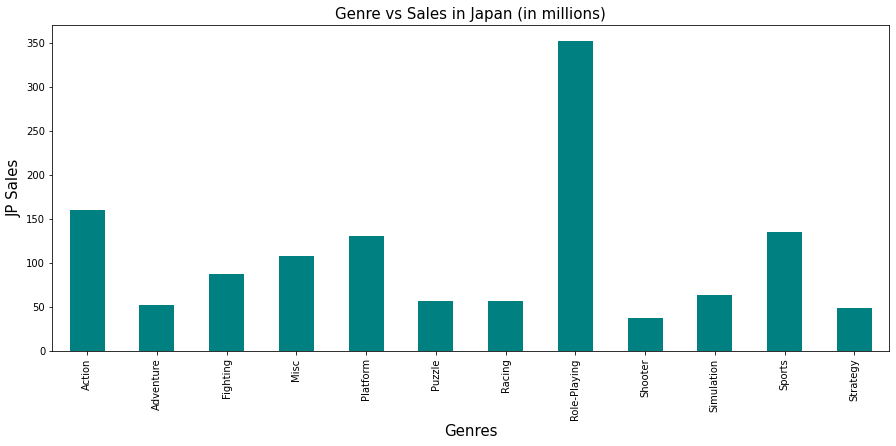

In [68]:
a = df.groupby('Genre')['JP_Sales'].sum('JP_Sales').sort_index().plot(kind = 'bar',figsize = (15,6), color='#008080')
a.set_xlabel('Genres',fontsize = 15)
a.set_ylabel('JP Sales',fontsize = 15)
a.set_title('Genre vs Sales in Japan (in millions)',fontsize = 15)
plt.show()

- Inference - We notice here that the role-playing highly dominates all other genres in Japan by a huge margin. The pattern is partially similar to that of north america and europe, only differences being that genres like action, shooter and sports have attracted lesser sales in Japan, whereas genre like role-playing has sold the most. 


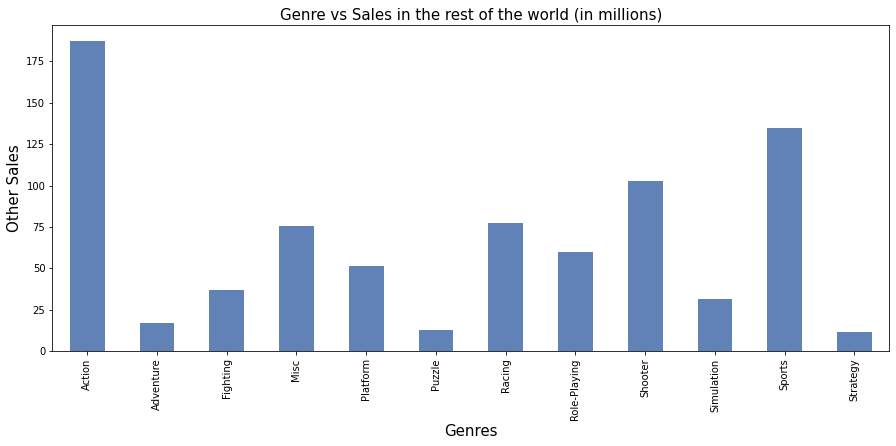

In [70]:
a = df.groupby('Genre')['Other_Sales'].sum('Other_Sales').sort_index().plot(kind = 'bar',figsize = (15,6), color='#6082b6')
a.set_xlabel('Genres',fontsize = 15)
a.set_ylabel('Other Sales',fontsize = 15)
a.set_title('Genre vs Sales in the rest of the world (in millions)',fontsize = 15)
plt.show()

- Inference - Sales in remaining parts of the world show similar patterns to that of north america and europe.

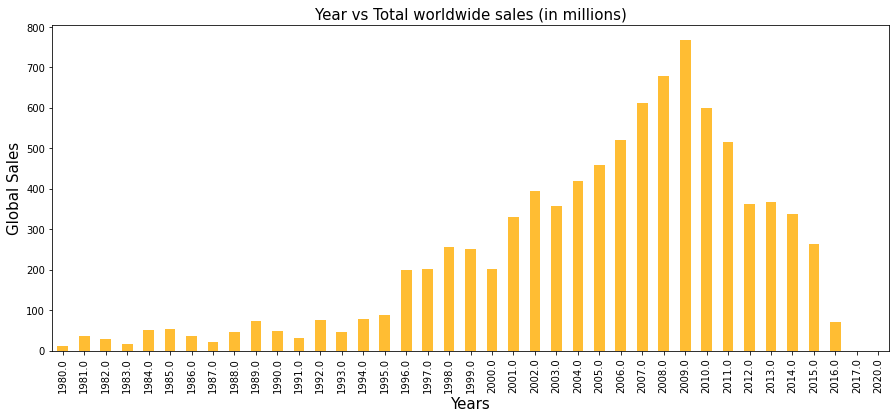

In [7]:
a = df.groupby('Year')['Global_Sales'].sum('Global_Sales').sort_index().plot(kind = 'bar',figsize = (15,6), color='#FFBD33')
a.set_xlabel('Years',fontsize = 15)
a.set_ylabel('Global Sales',fontsize = 15)
a.set_title('Year vs Total worldwide sales (in millions)',fontsize = 15)
plt.show()

- Inference - We notice here that the number of global video game sales have been significantly higher between 2001-2015 and highest during 2007-2011. These observations are similar to that of number of games released per year. Hence we can say that the more number of games released, more is the global sales as well as revenue.

In [29]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_log,Total,Total_log
Rank,1.000000,0.177803,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407,-0.983531,-0.424221,-0.979980
Year,0.177803,1.000000,-0.091454,0.005208,-0.170139,0.040322,-0.075303,-0.178957,-0.087830,-0.191395
NA_Sales,-0.401362,-0.091454,1.000000,0.767727,0.449787,0.634737,0.941047,0.499577,0.946622,0.501197
EU_Sales,-0.379123,0.005208,0.767727,1.000000,0.435584,0.726385,0.902836,0.477171,0.892585,0.474290
JP_Sales,-0.267785,-0.170139,0.449787,0.435584,1.000000,0.290186,0.611816,0.337525,0.631716,0.346285
Other_Sales,-0.332986,0.040322,0.634737,0.726385,0.290186,1.000000,0.748331,0.414172,0.686989,0.393392
Global_Sales,-0.427407,-0.075303,0.941047,0.902836,0.611816,0.748331,1.000000,0.534608,0.996106,0.533651
Global_Sales_log,-0.983531,-0.178957,0.499577,0.477171,0.337525,0.414172,0.534608,1.000000,0.530825,0.995528
Total,-0.424221,-0.087830,0.946622,0.892585,0.631716,0.686989,0.996106,0.530825,1.000000,0.532641
Total_log,-0.979980,-0.191395,0.501197,0.474290,0.346285,0.393392,0.533651,0.995528,0.532641,1.000000


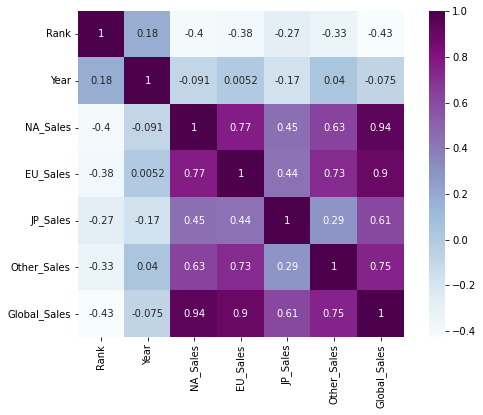

In [8]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, square=True, cmap="BuPu", annot=True)

- Inference - We see here that the pattern of global sales and that of north america are highly correlated. Sales in europe are strongly correlated with the sales in rest of the world. We also confirm the partial or weak correlation of sales pattern in Japan compared to others.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


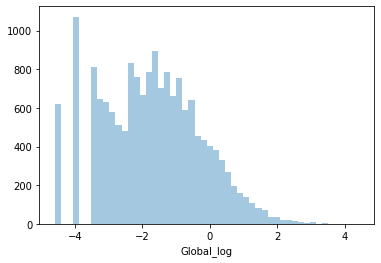

In [37]:
df['Global_log'] = np.log(df['Global_Sales'])
sns.distplot(df.Global_log, kde=False)

- Inference - We see here that the total worldwide sales has a normal distribution (also we have used feature engineering over here)